In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library to suppress warnings1
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"D:\DATA SCIENCE\Machine Learning\Ensemble\Insurance Dataset.csv",index_col='Id')
df.sample(5)

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4   
Id                                                                     
2251                1             A6              10        0.230769  \
9776                1             A8              10        0.230769   
2164                1             D3              26        0.230769   
11929               1             A8              10        0.050256   
3235                1             E1              26        0.198904   

       Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht   
Id                                                                          
2251                2               3               1  0.074627  0.618182  \
9776                2               1               1  0.432836  0.581818   
2164                2               3               1  0.477612  0.600000   
11929               2               3               1  0.343284  0.654545   
3235                2               3               1  0.447761  0.690909   

             Wt  ...  Medical_Keyword_40  Medical_Keyword_41   
Id               ...                                           
2251   0.163180  ...                   0                   0  \
9776   0.257322  ...                   0                   0   
2164   0.205021  ...                   0                   0   
11929  0.194561  ...                   1                   0   
3235   0.152720  ...                   0                   0   

       Medical_Keyword_42  Medical_Keyword_43  Medical_Keyword_44   
Id                                                                  
2251                    0                   0                   0  \
9776                    0                   0                   0   
2164                    0                   0                   0   
11929                   0                   0                   0   
3235                    0                   0                   0   

       Medical_Keyword_45  Medical_Keyword_46  Medical_Keyword_47   
Id                                                                  
2251                    0                   0                   0  \
9776                    0                   0                   0   
2164                    0                   0                   0   
11929                   0                   0                   0   
3235                    0                   0                   0   

       Medical_Keyword_48  Response  
Id                                   
2251                    0         8  
9776                    0         8  
2164                    0         8  
11929                   0         1  
3235                    0         7  

[5 rows x 127 columns]

In [3]:
pd.set_option('display.max_columns',None)

# <b><u>Variable Description 

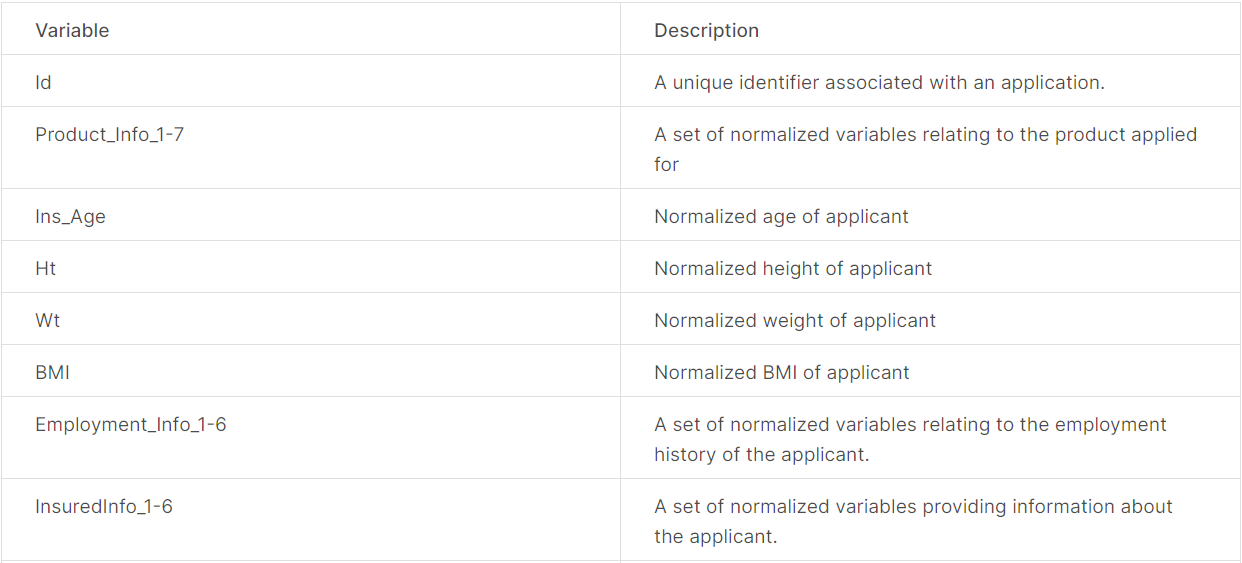

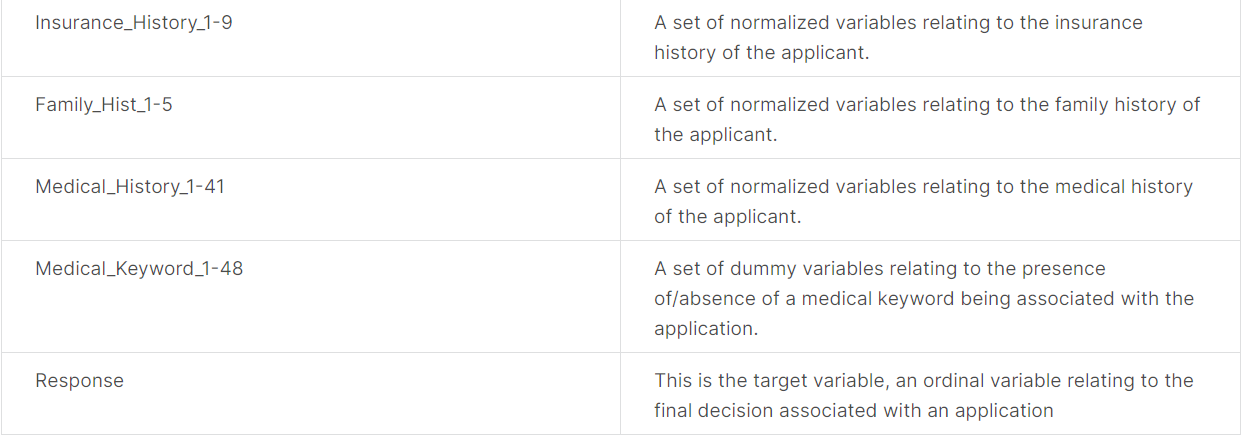

In [4]:
df.shape

(10000, 127)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2 to 13298
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 9.8+ MB


In [6]:
df.describe(include='all')

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4   
count     10000.000000          10000    10000.000000    10000.000000  \
unique             NaN             19             NaN             NaN   
top                NaN             D3             NaN             NaN   
freq               NaN           2352             NaN             NaN   
mean          1.028800            NaN       24.421200        0.331645   
std           0.167252            NaN        5.101293        0.284751   
min           1.000000            NaN        4.000000        0.000000   
25%           1.000000            NaN       26.000000        0.076923   
50%           1.000000            NaN       26.000000        0.230769   
75%           1.000000            NaN       26.000000        0.487179   
max           2.000000            NaN       37.000000        1.000000   

        Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age   
count     10000.000000    10000.000000    10000.000000  10000.000000  \
unique             NaN             NaN             NaN           NaN   
top                NaN             NaN             NaN           NaN   
freq               NaN             NaN             NaN           NaN   
mean          2.006600        2.669600        1.045600      0.404048   
std           0.080976        0.742759        0.298546      0.197710   
min           2.000000        1.000000        1.000000      0.000000   
25%           2.000000        3.000000        1.000000      0.238806   
50%           2.000000        3.000000        1.000000      0.402985   
75%           2.000000        3.000000        1.000000      0.567164   
max           3.000000        3.000000        3.000000      0.895522   

                  Ht            Wt           BMI  Employment_Info_1   
count   10000.000000  10000.000000  10000.000000        9995.000000  \
unique           NaN           NaN           NaN                NaN   
top              NaN           NaN           NaN                NaN   
freq             NaN           NaN           NaN                NaN   
mean        0.707144      0.292492      0.469630           0.076983   
std         0.073723      0.088672      0.123020           0.082994   
min         0.090909      0.092050      0.130238           0.000000   
25%         0.654545      0.225941      0.383573           0.035000   
50%         0.709091      0.288703      0.451275           0.060000   
75%         0.763636      0.347280      0.532503           0.095000   
max         1.000000      0.828452      1.000000           1.000000   

        Employment_Info_2  Employment_Info_3  Employment_Info_4   
count        10000.000000       10000.000000        8826.000000  \
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean             8.632300           1.302800           0.006518   
std              4.260788           0.716913           0.032966   
min              1.000000           1.000000           0.000000   
25%              9.000000           1.000000           0.000000   
50%              9.000000           1.000000           0.000000   
75%              9.000000           1.000000           0.000000   
max             38.000000           3.000000           1.000000   

        Employment_Info_5  Employment_Info_6  InsuredInfo_1  InsuredInfo_2   
count        10000.000000        8230.000000   10000.000000   10000.000000  \
unique                NaN                NaN            NaN            NaN   
top                   NaN                NaN            NaN            NaN   
freq                  NaN                NaN            NaN            NaN   
mean             2.145800           0.361435       1.213400       2.008900   
std              0.352923           0.352021       0.420093       0.093924   
min              2.000000           0.000000       1.000000   

## Exploring the dependent variable

In [7]:
df['Response'].value_counts()

Response
8    3270
6    1809
7    1369
2    1116
1    1095
5     929
4     255
3     157
Name: count, dtype: int64

In [8]:
df['Response'].isnull().sum()

0

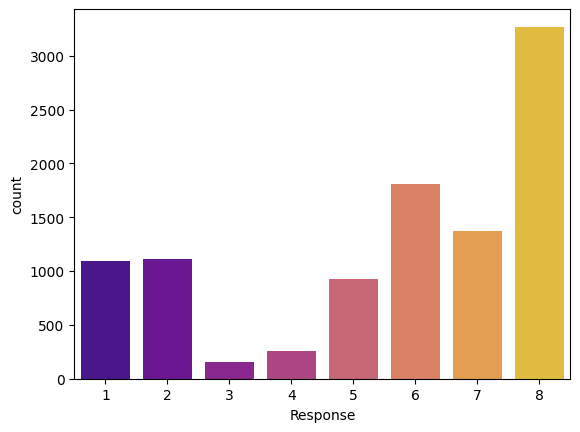

In [9]:
sns.countplot(df,x=df['Response'],palette='plasma')
plt.show()

## Converting the dependent variable to a binary variable (two possible labels/classes)

In [10]:
def new_response(x):
    if  1<= x <= 7:
        res = 0
    else:
        res = 1
    return res

In [11]:
df['new_response']=df['Response'].apply(lambda x: new_response(x) )

In [12]:
df['new_response'].value_counts()

new_response
0    6730
1    3270
Name: count, dtype: int64

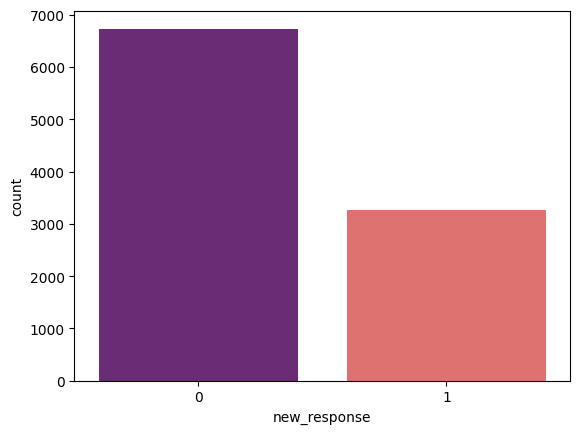

In [13]:
sns.countplot(df,x=df['new_response'],palette='magma')
plt.show()

In [14]:
df.drop('Response',axis=1,inplace=True)

In [15]:
df.head(2)

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4   
Id                                                                  
2                1             D3              10        0.076923  \
5                1             A1              26        0.076923   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht   
Id                                                                       
2                2               1               1  0.641791  0.581818  \
5                2               3               1  0.059701  0.600000   

          Wt       BMI  Employment_Info_1  Employment_Info_2   
Id                                                             
2   0.148536  0.323008              0.028                 12  \
5   0.131799  0.272288              0.000                  1   

    Employment_Info_3  Employment_Info_4  Employment_Info_5   
Id                                                            
2                   1                0.0                  3  \
5                   3                0.0                  2   

    Employment_Info_6  InsuredInfo_1  InsuredInfo_2  InsuredInfo_3   
Id                                                                   
2                 NaN              1              2              6  \
5              0.0018              1              2              6   

    InsuredInfo_4  InsuredInfo_5  InsuredInfo_6  InsuredInfo_7   
Id                                                               
2               3              1              2              1  \
5               3              1              2              1   

    Insurance_History_1  Insurance_History_2  Insurance_History_3   
Id                                                                  
2                     1                    1                    3  \
5                     2                    1                    3   

    Insurance_History_4  Insurance_History_5  Insurance_History_7   
Id                                                                  
2                     1             0.000667                    1  \
5                     1             0.000133                    1   

    Insurance_History_8  Insurance_History_9  Family_Hist_1  Family_Hist_2   
Id                                                                           
2                     1                    2              2            NaN  \
5                     3                    2              2       0.188406   

    Family_Hist_3  Family_Hist_4  Family_Hist_5  Medical_History_1   
Id                                                                   
2        0.598039            NaN       0.526786                4.0  \
5             NaN       0.084507            NaN                5.0   

    Medical_History_2  Medical_History_3  Medical_History_4   
Id                                                            
2                 112                  2                  1  \
5                 412                  2                  1   

    Medical_History_5  Medical_History_6  Medical_History_7   
Id                                                            
2                   1                  3                  2  \
5                   1                  3                  2   

    Medical_History_8  Medical_History_9  Medical_History_10   
Id                                                             
2                   2                  1                 NaN  \
5                   2                  1                 NaN   

    Medical_History_11  Medical_History_12  Medical_History_13   
Id                                                               
2                    3                   2                   3  \
5                    3                   2                   3   

    Medical_History_14  Medical_History_15  Medical_History_16   
Id                                                               
2                    3               240.0                   3  \


In [16]:
# Correlation Matrix
pd.set_option('display.max_rows',None)
df.select_dtypes(include=[np.number]).corr()


Product_Info_1  Product_Info_3  Product_Info_4   
Product_Info_1             1.000000        0.035364        0.082347  \
Product_Info_3             0.035364        1.000000        0.053583   
Product_Info_4             0.082347        0.053583        1.000000   
Product_Info_5             0.037655        0.021354        0.042540   
Product_Info_6            -0.089236       -0.021178       -0.107228   
Product_Info_7             0.017760        0.026788        0.056655   
Ins_Age                   -0.081818        0.006527       -0.255517   
Ht                         0.056606        0.289502        0.154570   
Wt                        -0.012507        0.205673       -0.020902   
BMI                       -0.050874        0.072987       -0.126735   
Employment_Info_1          0.061695        0.143868        0.352521   
Employment_Info_2          0.027212        0.187443        0.164751   
Employment_Info_3         -0.039374       -0.235161       -0.188305   
Employment_Info_4          0.013440       -0.031610        0.058873   
Employment_Info_5         -0.028787       -0.749151       -0.090731   
Employment_Info_6          0.023848       -0.003398        0.225696   
InsuredInfo_1             -0.041932       -0.027060        0.066460   
InsuredInfo_2              0.015514        0.023694       -0.008155   
InsuredInfo_3             -0.006843       -0.001685       -0.011811   
InsuredInfo_4             -0.048438       -0.065703       -0.071868   
InsuredInfo_5              0.008096        0.031572        0.000789   
InsuredInfo_6             -0.039713       -0.398277       -0.146888   
InsuredInfo_7              0.008001        0.033164       -0.021673   
Insurance_History_1        0.012889        0.017137        0.037534   
Insurance_History_2        0.009554        0.022734        0.011943   
Insurance_History_3       -0.007983        0.024750       -0.011345   
Insurance_History_4        0.013925       -0.011024        0.029620   
Insurance_History_5        0.019128        0.034093        0.355478   
Insurance_History_7        0.004507       -0.028959       -0.012836   
Insurance_History_8        0.013321        0.040235        0.040124   
Insurance_History_9        0.006389       -0.023698        0.014810   
Family_Hist_1             -0.013686        0.024568        0.040199   
Family_Hist_2             -0.044147       -0.003688       -0.033584   
Family_Hist_3             -0.033657        0.001464       -0.069399   
Family_Hist_4             -0.058389       -0.006316       -0.110206   
Family_Hist_5             -0.029876        0.012304       -0.079749   
Medical_History_1          0.029493        0.016845        0.049721   
Medical_History_2         -0.016070       -0.019712       -0.004919   
Medical_History_3         -0.016299       -0.041580       -0.154690   
Medical_History_4         -0.020554       -0.111832        0.034877   
Medical_History_5          0.038231       -0.006755        0.003628   
Medical_History_6          0.005464       -0.042544        0.020251   
Medical_History_7         -0.002654       -0.003647        0.008186   
Medical_History_8          0.008586       -0.014447       -0.030880   
Medical_History_9         -0.010999        0.011544        0.031562   
Medical_History_10        -0.142458       -0.141965       -0.199387   
Medical_History_11        -0.002302        0.003792        0.022309   
Medical_History_12        -0.011519       -0.003117       -0.042285   
Medical_History_13         0.001083        0.047271        0.048491   
Medical_History_14         0.007726        0.000549        0.019076   
Medical_History_15        -0.031924       -0.032583       -0.046333   
Medical_History_16         0.016390        0.000661       -0.075137   
Medical_History_17         0.010281       -0.004067        0.011475   
Medical_History_18         0.000041       -0.026493       -0.043326   
Medical_History_19        -0.001359       -0.075295       -0.019511   
Medical_History_20         0.015614        0.

In [17]:
# Duplicates
df.duplicated().sum()

0

In [18]:
# null values
print(df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0])
print('--'*80)
print("% of null values:\n  ")
print(round((df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]/len(df))*100,2))

Medical_History_10     9905
Medical_History_32     9803
Medical_History_24     9365
Medical_History_15     7446
Family_Hist_5          7122
Family_Hist_3          5755
Family_Hist_2          4799
Insurance_History_5    4257
Family_Hist_4          3147
Employment_Info_6      1770
Medical_History_1      1546
Employment_Info_4      1174
Employment_Info_1         5
dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
% of null values:
  
Medical_History_10     99.05
Medical_History_32     98.03
Medical_History_24     93.65
Medical_History_15     74.46
Family_Hist_5          71.22
Family_Hist_3          57.55
Family_Hist_2          47.99
Insurance_History_5    42.57
Family_Hist_4          31.47
Employment_Info_6      17.70
Medical_History_1      15.46
Employment_Info_4      11.74
Employment_Info_1       0.05
dtype: float64


### Dropping the columns with more than 40% null values

In [19]:
df.isnull().sum()[df.isnull().sum()>len(df)*0.4]

Insurance_History_5    4257
Family_Hist_2          4799
Family_Hist_3          5755
Family_Hist_5          7122
Medical_History_10     9905
Medical_History_15     7446
Medical_History_24     9365
Medical_History_32     9803
dtype: int64

In [20]:
df=df.dropna(thresh=len(df)*0.6,axis=1)

In [21]:
df.shape

(10000, 119)

In [22]:
#Columns having null values:(These null values we fill after train-test-split)
df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]

Family_Hist_4        3147
Employment_Info_6    1770
Medical_History_1    1546
Employment_Info_4    1174
Employment_Info_1       5
dtype: int64

In [23]:
df[list(df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0].index)]

Family_Hist_4  Employment_Info_6  Medical_History_1  Employment_Info_4   
Id                                                                              
2                NaN                NaN                4.0           0.000000  \
5           0.084507           0.001800                5.0           0.000000   
6           0.225352           0.030000               10.0           0.000000   
7           0.352113           0.200000                0.0           0.000000   
8           0.408451           0.050000                NaN           0.000000   
10          0.507042           1.000000                6.0           0.000000   
11          0.549296           0.800000                5.0                NaN   
14               NaN           1.000000                6.0           0.000000   
15          0.676056           1.000000                4.0           0.000000   
16               NaN           0.050000                NaN           0.000000   
17          0.647887           0.150000                1.0                NaN   
18          0.352113           1.000000                4.0                NaN   
19               NaN                NaN                5.0           0.000000   
20          0.338028           0.075000                NaN                NaN   
22          0.535211           0.600000                1.0           0.000000   
23               NaN                NaN                1.0           0.000000   
24          0.253521           0.250000                1.0           0.000000   
25          0.436620           0.036000               39.0           0.000000   
26          0.507042                NaN               61.0           0.000000   
27          0.281690           0.000000                0.0           0.000000   
29          0.478873           0.500000                8.0           0.000000   
31               NaN           1.000000                2.0           0.000000   
32          0.394366           0.000000                1.0           0.000000   
33          0.281690           0.350000                3.0           0.000000   
34          0.253521           0.150000               22.0           0.000000   
35          0.394366           0.350000                NaN           0.000000   
37               NaN           1.000000                1.0           0.000000   
39               NaN                NaN                1.0           0.000000   
40          0.450704           0.120000                0.0           0.000000   
41          0.661972           1.000000                8.0           0.000000   
42          0.408451           0.050000                1.0           0.000000   
44          0.549296           0.100000               11.0           0.000000   
46          0.366197           0.100000                1.0           0.000000   
47               NaN           0.400000                1.0           0.000000   
49          0.605634           0.300000                2.0           0.000000   
52               NaN           0.500000               19.0                NaN   
53          0.098592                NaN                3.0           0.000000   
56          0.661972           0.050000                6.0           0.000000   
57               NaN                NaN                1.0           0.000000   
58          0.676056           1.000000                1.0           0.000000   
60               NaN           1.000000                5.0           0.010000   
61               NaN           0.450000                5.0           0.000000   
64               NaN           0.150000                7.0           0.000000   
65               NaN           0.200000                2.0                NaN   
67               NaN           1.000000                2.0           0.072000   
68               NaN           0.100000                0.0           0.000000   
70               NaN           1.000000               16.0           0.000000   
71          0.647887           0.00000

### Dropping the categorical feature('Product_Info_2')  since it has a lot of categories:

In [24]:
print(df['Product_Info_2'].value_counts())
df.drop('Product_Info_2',axis=1,inplace=True)

Product_Info_2
D3    2352
D4    1797
D1    1183
A8    1124
D2    1041
E1     461
A1     395
A6     368
A2     330
A7     224
B2     193
A3     155
A5     148
C1      60
C3      58
C4      41
A4      37
C2      25
B1       8
Name: count, dtype: int64


In [25]:
df.shape

(10000, 118)

### Splitting the data into train and test

In [26]:
# Independent Variable
X=df.drop('new_response',axis=1)

# Dependent Variable
y=df['new_response']


In [27]:
X.shape,y.shape

((10000, 117), (10000,))

In [28]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [30]:
X_train.shape,X_test.shape

((7000, 117), (3000, 117))

In [31]:
#Filling null values:
X_train=X_train.fillna(X_train.mean())
X_test= X_test.fillna(X_train.mean())

## Model Building 

In [32]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,classification_report,roc_auc_score

In [33]:
ada= AdaBoostClassifier(random_state=12)
rfc = RandomForestClassifier(random_state=12)
gbc= GradientBoostingClassifier(random_state=12)
xgb=XGBClassifier(random_state=12)

In [34]:
clfs= {
          'Ada Boost' : ada,
         'Random Forest' :  rfc,
         'Gradient Boosting' : gbc,
      'eXt. Gradient Boosting' : xgb
             }

In [35]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    
    return accuracy,precision

In [36]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,X_test,y_train,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [37]:
performance_indicator = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [38]:
performance_indicator

Algorithm  Accuracy  Precision
1           Random Forest  0.819333   0.744160
2       Gradient Boosting  0.827000   0.722973
3  eXt. Gradient Boosting  0.814333   0.714141
0               Ada Boost  0.823333   0.708990

### Best performing algorithm in terms of Accuracy and  Precision  is : Random Forest

### For further improving the performance of Random Forest

### Provide the range of values for chosen hyperparameters

In [39]:
# Number of trees
n_estimators = [80,100,120]

# Maximum depth of trees
max_depth = [None,4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [40,50,60,70]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30]
# Max features
max_features= ['auto', 'sqrt', 'log2']

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
             'max_features' : max_features}

In [40]:
# Perform randomized search with cross-validation
rfc_randomized = RandomizedSearchCV(estimator=rfc,param_distributions=param_dict,cv=5,verbose=2,scoring='roc_auc')
rfc_randomized.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=60, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estim

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12),
                   param_distributions={'max_depth': [None, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 20, 30],
                                        'min_samples_split': [40, 50, 60, 70],
                                        'n_estimators': [80, 100, 120]},
                   scoring='roc_auc', verbose=2)

In [41]:
rfc_randomized.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=70,
                       n_estimators=120, random_state=12)

In [42]:
rfc_randomized.best_params_

{'n_estimators': 120,
 'min_samples_split': 70,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10}

### Optimal Model

In [43]:
rfc_optimal_model = rfc_randomized.best_estimator_

In [44]:
y_pred1= rfc_optimal_model.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred1)

0.8096666666666666

In [46]:
precision_score(y_test,y_pred1)

0.75

In [47]:
roc_auc_score(y_test,y_pred1)

0.7626879507068175

In [48]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[1814,  205],
       [ 366,  615]], dtype=int64)

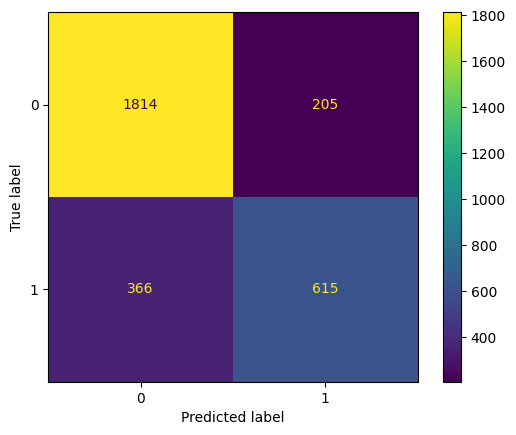

In [49]:
dis=ConfusionMatrixDisplay(cm)
dis.plot()

In [50]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2019
           1       0.75      0.63      0.68       981

    accuracy                           0.81      3000
   macro avg       0.79      0.76      0.77      3000
weighted avg       0.81      0.81      0.80      3000



In [51]:
rfc_optimal_model.feature_importances_

array([5.79548506e-04, 3.46801652e-03, 3.13745743e-02, 5.78843949e-05,
       9.34232392e-04, 2.97563769e-04, 3.56676483e-02, 1.75794465e-02,
       1.35011137e-01, 2.63886634e-01, 1.15855443e-02, 4.94595084e-03,
       1.56708215e-03, 2.43486406e-03, 1.80287119e-03, 5.53996944e-03,
       2.23861089e-03, 1.32637713e-03, 3.22006289e-03, 2.33571559e-03,
       7.53530054e-04, 3.22738332e-02, 2.96666967e-03, 8.12917411e-04,
       1.66188453e-03, 1.02372257e-03, 1.02259217e-03, 1.40020501e-03,
       2.03032914e-03, 1.28237174e-03, 1.16474896e-02, 2.25543970e-02,
       1.08216264e-02, 9.29965218e-03, 9.11600517e-04, 1.11267818e-01,
       5.40586523e-04, 2.49615523e-03, 8.26156469e-05, 6.55345233e-04,
       1.04950145e-03, 0.00000000e+00, 2.84355098e-04, 3.70320657e-03,
       1.99430020e-04, 2.41004590e-03, 1.37194997e-03, 7.54332961e-04,
       2.94888134e-04, 4.56786910e-04, 6.51765973e-04, 1.20825883e-05,
       9.11019668e-02, 8.46281634e-04, 8.24209290e-04, 0.00000000e+00,
      

In [52]:
Importance_df=pd.DataFrame({'Feature':list(X_train.columns),'Feature Importance': rfc_optimal_model.feature_importances_})

In [53]:
feature_importance=Importance_df.sort_values(by=['Feature Importance'],ascending=False)
feature_importance

Feature  Feature Importance
9                    BMI            0.263887
8                     Wt            0.135011
35     Medical_History_4            0.111268
52    Medical_History_23            0.091102
83    Medical_Keyword_15            0.086162
6                Ins_Age            0.035668
21         InsuredInfo_6            0.032274
2         Product_Info_4            0.031375
31         Family_Hist_4            0.022554
7                     Ht            0.017579
71     Medical_Keyword_3            0.013247
30         Family_Hist_1            0.011647
10     Employment_Info_1            0.011586
66    Medical_History_39            0.011257
32     Medical_History_1            0.010822
33     Medical_History_2            0.009300
60    Medical_History_33            0.008808
91    Medical_Keyword_23            0.007436
93    Medical_Keyword_25            0.006924
15     Employment_Info_6            0.005540
58    Medical_History_30            0.005402
11     Employment_Info_2            0.004946
43    Medical_History_13            0.003703
1         Product_Info_3            0.003468
18         InsuredInfo_3            0.003220
22         InsuredInfo_7            0.002967
37     Medical_History_6            0.002496
13     Employment_Info_4            0.002435
45    Medical_History_16            0.002410
19         InsuredInfo_4            0.002336
16         InsuredInfo_1            0.002239
28   Insurance_History_8            0.002030
14     Employment_Info_5            0.001803
110   Medical_Keyword_42            0.001743
24   Insurance_History_2            0.001662
12     Employment_Info_3            0.001567
27   Insurance_History_7            0.001400
46    Medical_History_17            0.001372
116   Medical_Keyword_48            0.001353
69     Medical_Keyword_1            0.001328
17         InsuredInfo_2            0.001326
29   Insurance_History_9            0.001282
67    Medical_History_40            0.001056
40     Medical_History_9            0.001050
25   Insurance_History_3            0.001024
26   Insurance_History_4            0.001023
68    Medical_History_41            0.000993
4         Product_Info_6            0.000934
57    Medical_History_29            0.000928
34     Medical_History_3            0.000912
53    Medical_History_25            0.000846
54    Medical_History_26            0.000824
23   Insurance_History_1            0.000813
61    Medical_History_34            0.000773
56    Medical_History_28            0.000771
108   Medical_Keyword_40            0.000761
47    Medical_History_18            0.000754
20         InsuredInfo_5            0.000754
63    Medical_History_36            0.000732
105   Medical_Keyword_37            0.000702
39     Medical_History_8            0.000655
50    Medical_History_21            0.000652
0         Product_Info_1            0.000580
36     Medical_History_5            0.000541
80    Medical_Keyword_12            0.000462
49    Medical_History_20            0.000457
79    Medical_Keyword_11            0.000412
74     Medical_Keyword_6            0.000409
92    Medical_Keyword_24            0.000354
64    Medical_History_37            0.000332
103   Medical_Keyword_35            0.000310
5         Product_Info_7            0.000298
48    Medical_History_19            0.000295
42    Medical_History_12            0.000284
90    Medical_Keyword_22            0.000247
88    Medical_Keyword_20            0.000235
44    Medical_History_14            0.000199
98    Medical_Keyword_30            0.000174
78    Medical_Keyword_10            0.000167
113   Medical_Keyword_45            0.000161
101   Medical_Keyword_33            0.000125
89    Medical_Keyword_21            0.000094
115   Medical_Keyword_47            0.000092
102   Medical_Keyword_34            0.000088
38     Medical_History_7            0.000083
85    Medical_Keyword_17            0.000076
100   Medical_Keyword_32            0.000069
109   Medical_Keyword_41            0.000068
3         Pr

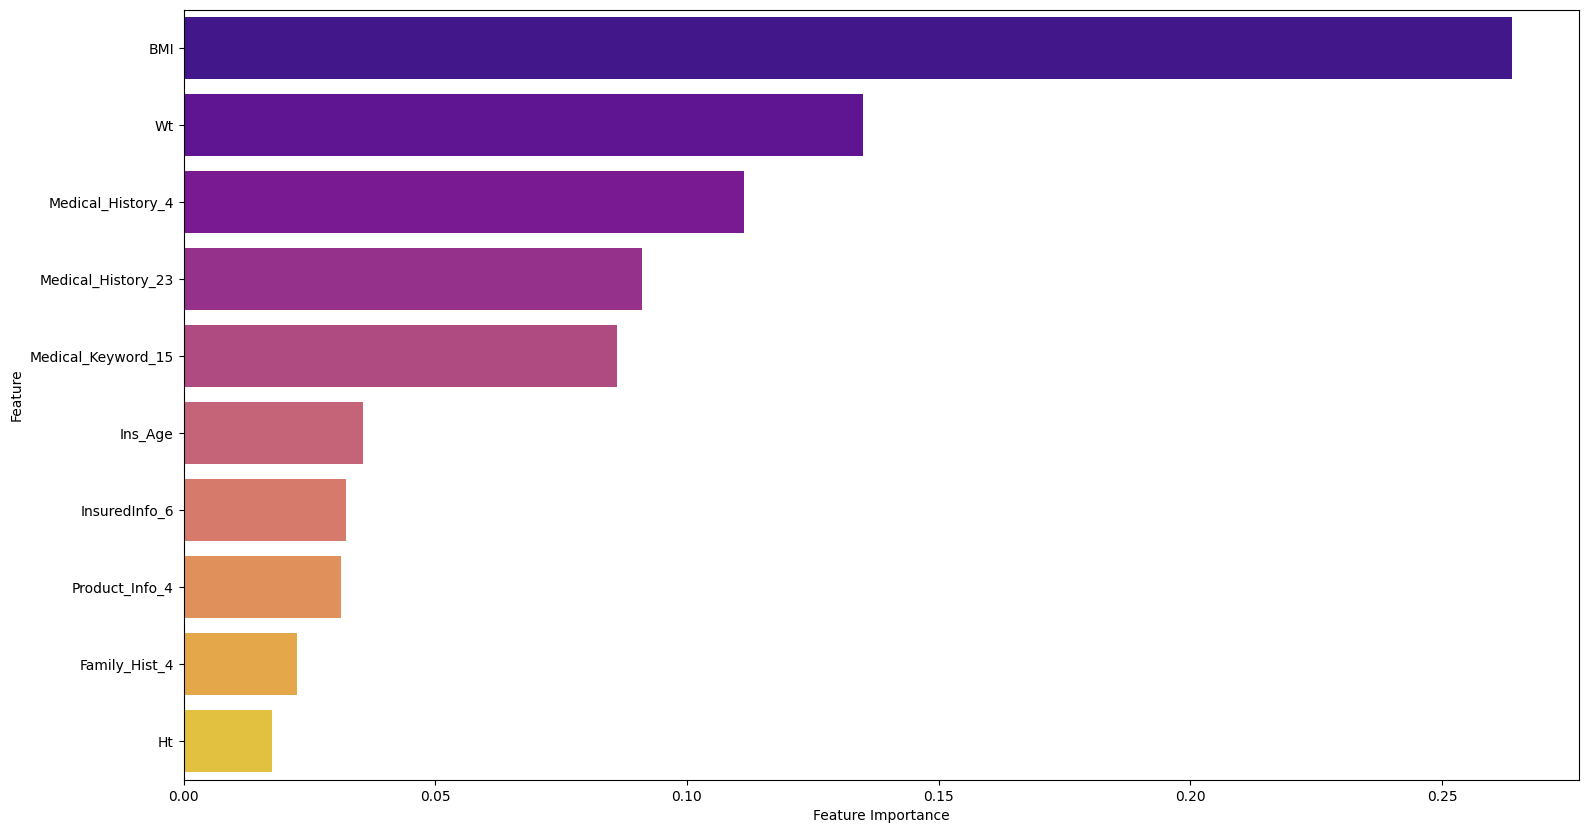

In [54]:
plt.figure(figsize=(18,10))
sns.barplot(y='Feature',x='Feature Importance',data=feature_importance[feature_importance['Feature Importance']>0][:10],palette='plasma')
plt.show()